In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from operator import itemgetter
from nltk.tokenize import TweetTokenizer
from pprint import pprint

In [4]:
import re
 
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]
    
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=True):
    tknzr = TweetTokenizer()
    ttokens = tknzr.tokenize(s)
    
    tokens = tokenize(" ".join(ttokens))
    if lowercase:
        #tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
        tokens = [token.lower() for token in tokens if token.isalpha()]
        tokens = set(tokens)
    return list(tokens)
 
tweet = 'RT  Example @marcobonzanini: just an example! :D http://example.com #NLP\u2025'
print(preprocess(tweet))
# ['RT', '@marcobonzanini', ':', 'just', 'an', 'example', '!', ':D', 'http://exampl

[u'rt', u'example', u'just', u'an']


In [5]:
stoplist = set([line.replace("\n","") for line in open('/home/ynh3/Data/stopword-list2.txt')])
pun = [',', '-','.', ':', '(', ')', '--', ';', '...', '?','today','follow','stats','can', 'say', 'says', 'will','may', 'must', 'us', 'via','a','the', 'rt', 'gg', 'gt', 'lt', 'la', 'de', 'te', 'lol', 'follow', 'followers', 'unfollow', 'unfollowers', 'unfollower', 'follower']

with open('/home/ynh3/Data/common_list.txt','rt') as myfile:
    common_word = myfile.read().splitlines()


In [6]:
f = open("/home/ynh3/Documents/ExS/results/categorized_tweets_enhanced_2ndweek/Experiments_set2/nw_exp1_cluster1.txt")

search_word = 'south'
tweets_data = []
com = defaultdict(lambda : defaultdict(int))
count_search = Counter()
tweet_tokens = []
ngrams_tokens = []

for line in f:
    tweets_data.append(line.replace("\n", ""))

    terms_only = [term for term in preprocess(line) 
                      if term not in stoplist and term not in common_word and term not in pun
                      and not term.startswith(('#', '@')) and 'http' not in term]
    
    terms_ngrams = [term for term in preprocess(line) 
                      if term not in pun
                      and 'http' not in term]
                
                #if count < 20: 
                #    print tweet['text']
                #    print terms_only
    tweet_tokens += terms_only
    ngrams_tokens += terms_ngrams
                
    for i in range(len(terms_only)-1):            
        #for j in range(i+1, len(terms_only)):
        for j in range(len(terms_only)-1):
            w1, w2 = sorted([terms_only[i], terms_only[j]])                
            if w1 != w2:
                com[w1][w2] += 1

    if search_word in terms_only:
        count_search.update(terms_only)


In [7]:
len(tweet_tokens)

2193

In [8]:
len(ngrams_tokens)

3370

## Using NLTK Bigrams and FreqDist to show most common frequent words

In [22]:
## Using NLTK Bigrams to show most common frequent words
from nltk import bigrams,trigrams, ngrams
from nltk.probability import *

n = 4
terms_bigram = ngrams(ngrams_tokens, n)
terms_bigram

%matplotlib inline
pairs = [ " ".join(pair) for pair in terms_bigram]
#frequent bigrams
fdist = FreqDist(pairs)
bigr = fdist.keys()
fifty_popular_bigr = fdist.most_common(20)
print fifty_popular_bigr
#fdist.plot(5)
#pairs

[(u'unarmed video officer man', 49), (u'murder police after shooting', 42), (u'shooting unarmed video officer', 41), (u'video officer man shows', 41), (u'man shows with him', 41), (u'shows with him charged', 41), (u'charged murder police after', 41), (u'police after shooting unarmed', 41), (u'after shooting unarmed video', 41), (u'officer man shows with', 41), (u'with him charged murder', 40), (u'him charged murder police', 40), (u'charged with south carolina', 30), (u'with south carolina surfaces', 24), (u'to video york aftermath', 22), (u'and made times to', 22), (u'made times to video', 22), (u'new shooting south captured', 22), (u'york aftermath new shooting', 22), (u'shooting south captured carolina', 22)]


In [10]:
fifty_popular_bigr

[(u'unarmed video officer man', 49),
 (u'murder police after shooting', 42),
 (u'shooting unarmed video officer', 41),
 (u'video officer man shows', 41),
 (u'man shows with him', 41),
 (u'shows with him charged', 41),
 (u'charged murder police after', 41),
 (u'police after shooting unarmed', 41),
 (u'after shooting unarmed video', 41),
 (u'officer man shows with', 41),
 (u'with him charged murder', 40),
 (u'him charged murder police', 40),
 (u'charged with south carolina', 30),
 (u'with south carolina surfaces', 24),
 (u'to video york aftermath', 22),
 (u'and made times to', 22),
 (u'made times to video', 22),
 (u'new shooting south captured', 22),
 (u'york aftermath new shooting', 22),
 (u'shooting south captured carolina', 22)]

### Plot the results using Pandas Plotting
**Bigrams
*Trigrams
*Ngrams

In [23]:
pd_common = pd.DataFrame()
pd_common['count']=map(lambda bi:bi[1], fifty_popular_bigr)
pd_common['bigram']=map(lambda bi:bi[0], fifty_popular_bigr)

In [29]:
pd_common

,count,bigram
0,49,unarmed video officer man
1,42,murder police after shooting
2,41,shooting unarmed video officer
3,41,video officer man shows
4,41,man shows with him
5,41,shows with him charged
6,41,charged murder police after
7,41,police after shooting unarmed
8,41,after shooting unarmed video
9,41,officer man shows with


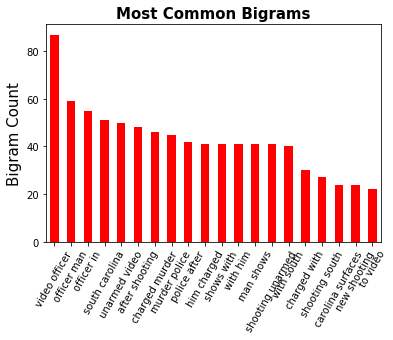

In [17]:
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_ylabel('Bigram Count' , fontsize=15)
ax.set_title('Most Common Bigrams', fontsize=15, fontweight='bold')

pd_common['count'].plot(ax=ax, kind='bar', color='red')
ax.set_xticklabels(pd_common['bigram'],rotation=60)


#x=[str(b[0]) for b in fifty_popular_bigr]
#y=[b[1] for b in fifty_popular_bigr]
#plt.bar(x, y, width=0.8,color='g')

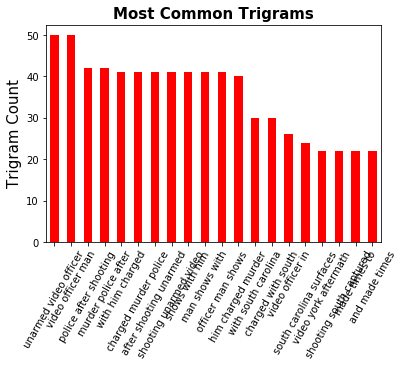

In [21]:
fig, ax = plt.subplots()
#ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('Most Common Trigrams', fontsize=15, fontweight='bold')
ax.set_ylabel('Trigram Count' , fontsize=15)

pd_common['count'].plot(ax=ax, kind='bar', color='red')
ax.set_xticklabels(pd_common['bigram'],rotation=60)


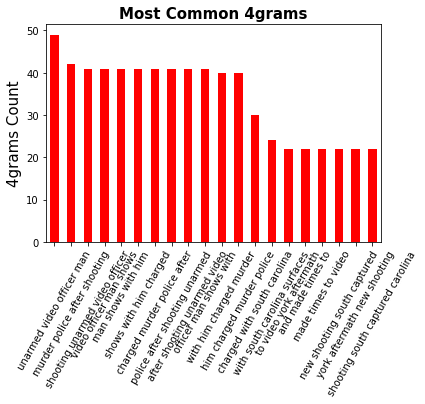

In [24]:
fig, ax = plt.subplots()
#ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('Most Common 4grams', fontsize=15, fontweight='bold')
ax.set_ylabel('4grams Count' , fontsize=15)

pd_common['count'].plot(ax=ax, kind='bar', color='red')
ax.set_xticklabels(pd_common['bigram'],rotation=60)



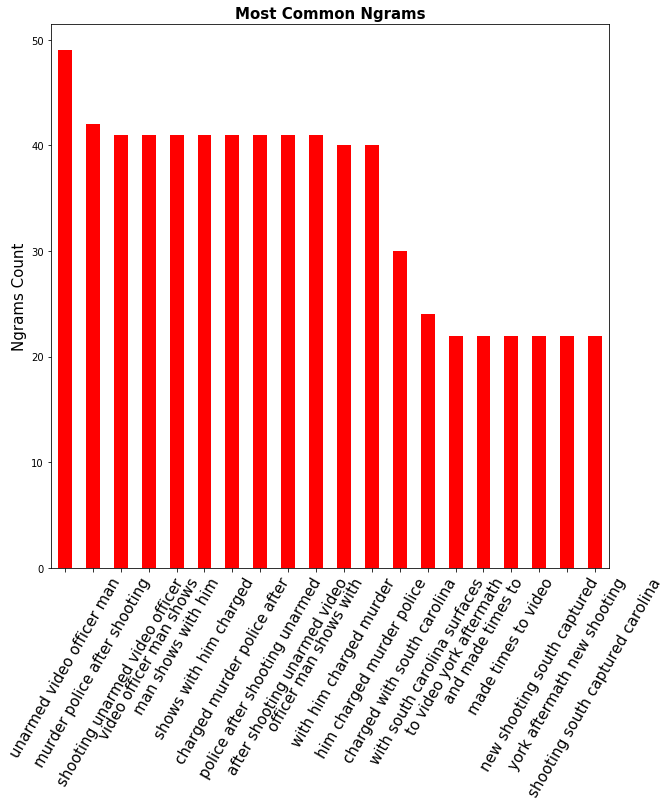

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
#ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_title('Most Common Ngrams', fontsize=15, fontweight='bold')
ax.set_ylabel('Ngrams Count' , fontsize=15)

pd_common['count'].plot(ax=ax, kind='bar', color='red')
ax.set_xticklabels(pd_common['bigram'],rotation=60,fontsize=15)

In [135]:
fdist = FreqDist(tweet_tokens)
fdist.freq('officer')

0.06885544915640675

In [118]:
fdist

FreqDist()

In [134]:
l = fdist.max()
l

u'officer'

### Finding most common words of the cluster using FreqDist

In [128]:
#Making dictionary
words_only = [w for w in tweet_tokens if w.isalpha()]
dic = set([w.lower() for w in words_only])
word_count = len(dic)
print word_count

299


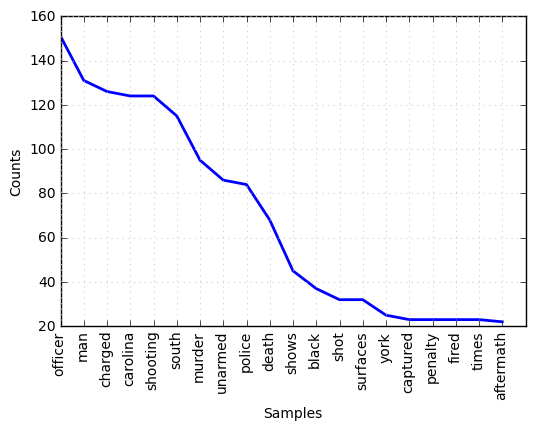

In [152]:
#Plot the frequencies
fdist = FreqDist(tweet_tokens)
fdist.plot(20) # Plots word + frequency
#fdist.plot(20,cumulative=True) # Plots word + cumulative freq.

##  FINDING CO-OCCURANCE OF TERMS 

In [146]:
com_max = []
# For each term, look for the most common co-occurrent terms
for t1 in com:
    t1_max_terms = sorted(com[t1].items(), key=itemgetter(1), reverse=True)[:5]
    for t2, t2_count in t1_max_terms:
        com_max.append(((t1, t2), t2_count))
# Get the most frequent co-occurrences
terms_max = sorted(com_max, key=itemgetter(1), reverse=True)
#terms_max[:50]

print("Co-occurrence for %s:" % search_word)
print(count_search.most_common(20))